In [2]:
import os
import librosa
import numpy as np
import tqdm
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display
%matplotlib inline

In [3]:
feature_dim_1 = 20
feature_dim_2 = 15
channel = 1
epochs = 100
batch_size = 100
verbose = 1
num_classes = 19 #categories

In [57]:
def wav2mfcc(file_path, max_pad_len=feature_dim_2):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000)
    pad_width = max_pad_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    #print(mfcc.shape)
    return mfcc

def calculate_MFCC(file_path):
    samples, sample_rate = librosa.load(file_path)
    S = librosa.feature.melspectrogram(samples, sr=16000, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=21)
    return librosa.feature.delta(_mfcc, order=2)

def calculate_Mel_LogSpectrum_Mfcc(file_path,sampleRate = 16000):
    max_pad_len = 15
    samples, sample_rate = librosa.load(file_path)
    S = librosa.feature.melspectrogram(samples, sr=16000, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=21)
    return S, log_S, mfcc
    #print("mfcc.shape[1] is {}".format(mfcc.))
    #pad_width = max_pad_len - mfcc.shape[1]
    #mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    
def Draw_MelSpectrogram_LogS_MFCC(wavfilePath,samplerate=16000):
    _melspectrum, _log_s, _mfcc =  calculate_Mel_LogSpectrum_Mfcc(wavfilePath)
    delta2_mfcc = librosa.feature.delta(_mfcc, order=2)
    print("delta2_mfcc shape is {}".format(delta2_mfcc.shape))
    #Draw MelSpectrogram
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(_log_s, sr=samplerate, x_axis='time', y_axis='mel')
    plt.title('Mel power spectrogram ')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    #Draw MFCC
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(delta2_mfcc)
    plt.ylabel('MFCC coeffs')
    plt.xlabel('Time')
    plt.title('MFCC')
    plt.colorbar()
    plt.tight_layout()
    print("mfcc shape is : {}".format(_mfcc.shape))
    
def drawNpy(npyFile):
    img_array = np.load(npyFile)
    plt.imshow(img_array)
    librosa.display.specshow(img_array)
    plt.ylabel('MFCC coeffs')
    plt.xlabel('Time')
    plt.title('MFCC')
    plt.colorbar()
    plt.tight_layout()

/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


delta2_mfcc shape is (21, 44)
mfcc shape is : (21, 44)
delta2_mfcc shape is (21, 44)
mfcc shape is : (21, 44)


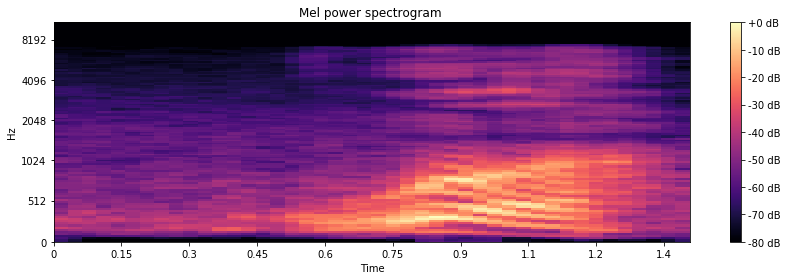

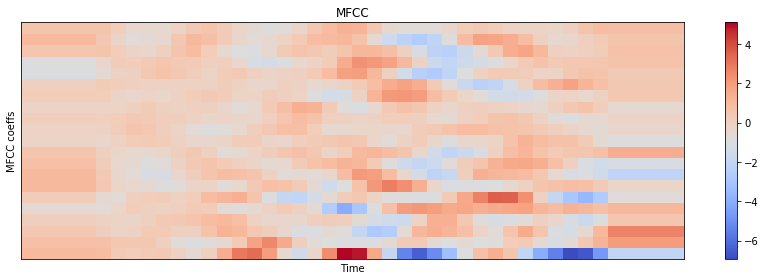

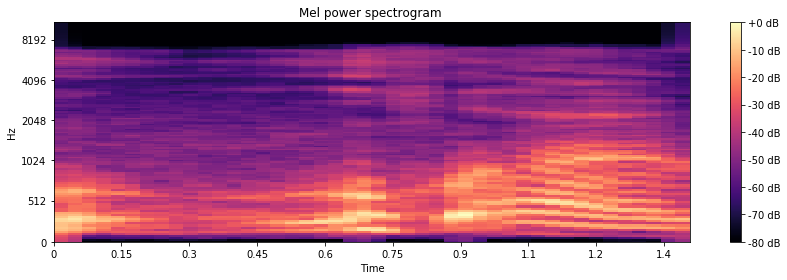

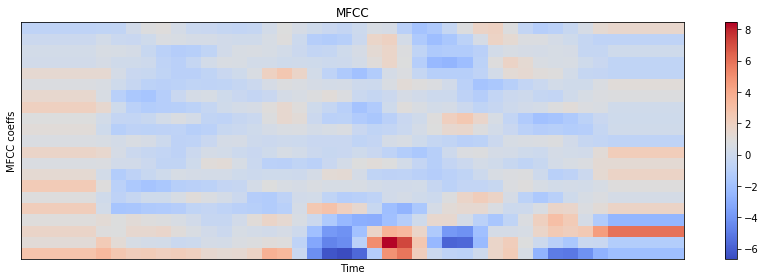

In [53]:
sun_test_file_path1 = "../../DyAudio_Corpus/DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_0_rec.wav"
home_sun_test_file_path1 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_0_rec.wav"
sun_test_file_path2 = "../../DyAudio_Corpus/DysSpeech_Corpora//DrSun/filtered_train_wavfiles/1/DrSun0822_4711_1_rec.wav"
home_sun_test_file_path2 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_1_rec.wav"
#sun_test_file_path3 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_2_rec.wav"
#sun_test_file_path4 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_3_rec.wav"
#sun_test_file_path5 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_4_rec.wav"
#sun_test_file_path6 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_5_rec.wav"
#sun_test_file_path7 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_6_rec.wav"
#sun_test_file_path8 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_7_rec.wav"
#calculateMFCC(sun_test_file_path)
#wav2mfcc(sun_test_file_path)
Draw_MelSpectrogram_LogS_MFCC(sun_test_file_path1)
Draw_MelSpectrogram_LogS_MFCC(sun_test_file_path2)

In [28]:
_melspectrum, _log_s, _mfcc =  calculate_Mel_LogSpectrum_Mfcc(sun_test_file_path1)
delta2_mfcc_ = librosa.feature.delta(_mfcc, order=2)

/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [34]:
def output_spectrum_info(specData):
    print("Spectrum is type of {}".format(type(specData)))
    print("Spectrum shape is {}".format(specData.shape))
    
def save_mfcc_to_array(mfccData,targetPath):
    np.save(targetPath+"mels.npy",mfccData)
    
def save_mels_to_array(melsData,targetPath):
    np.save(targetPath+"mels.npy",melsData)

In [59]:
folderList = ['1','2','3','4','5','6','7','8','9','10', '11', '12','13','14', '15','16','17','18','19']
#save_mfcc_to_array(delta2_mfcc_,"./test_mfcc/")
def save_train_data_to_npy(rootPath,desRootPath):
    for folder in folderList:#DYSCmdCategString:
        # Init mfcc vectors
        mfcc_vectors = []
        wavfiles = [rootPath + folder +"/"+ wav for wav in os.listdir(rootPath + folder+'/') if wav.endswith('.wav')]#if wavfile.endswith('.wav')
        #wavfiles = [wavfile for wavfile in ]
        print("Current folder is : ",folder)
        #print("the whole files are : ",wavfiles)
        #print("+++++++++++++++++++++++++++++++++++++")
        for _wav in wavfiles:#tqdm(wavfiles, "Saving vectors of label - '{}'".format(folder)):
            #mfcc_ = wav2mfcc(wavfile)
            mfcc_ = calculate_MFCC(_wav)
            mfcc_vectors.append(mfcc_)
        print("length of mfcc_vectors is : ",len(mfcc_))
        np.save("./"+desRootPath+folder + '.npy', mfcc_vectors)

In [60]:
save_train_data_to_npy("../../DyAudio_Corpus/DysSpeech_Corpora/DrSun/filtered_train_wavfiles/","./delta_mfcc")

Current folder is :  1
length of mfcc_vectors is :  21
Current folder is :  2


/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


length of mfcc_vectors is :  21
Current folder is :  3
length of mfcc_vectors is :  21
Current folder is :  4
length of mfcc_vectors is :  21
Current folder is :  5
length of mfcc_vectors is :  21
Current folder is :  6
length of mfcc_vectors is :  21
Current folder is :  7
length of mfcc_vectors is :  21
Current folder is :  8
length of mfcc_vectors is :  21
Current folder is :  9
length of mfcc_vectors is :  21
Current folder is :  10
length of mfcc_vectors is :  21
Current folder is :  11
length of mfcc_vectors is :  21
Current folder is :  12
length of mfcc_vectors is :  21
Current folder is :  13
length of mfcc_vectors is :  21
Current folder is :  14
length of mfcc_vectors is :  21
Current folder is :  15
length of mfcc_vectors is :  21
Current folder is :  16
length of mfcc_vectors is :  21
Current folder is :  17
length of mfcc_vectors is :  21
Current folder is :  18
length of mfcc_vectors is :  21
Current folder is :  19
length of mfcc_vectors is :  21


In [37]:
output_spectrum_info(delta2_mfcc_)

Spectrum is type of <class 'numpy.ndarray'>
Spectrum shape is (21, 44)


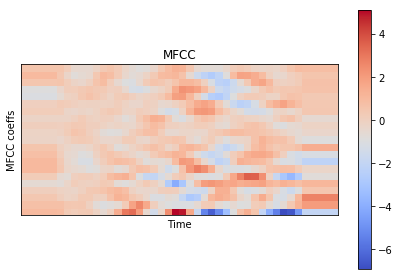

In [46]:
drawNpy("./test_mfcc/mels.npy")

# Spectrum calculation

In [8]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

# Calculating Spectrum manually

In [9]:
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks

In [10]:
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))
    
    # zeros at beginning (thus center of 1st window should be for sample nr. 0)
    samples = np.append(np.zeros(np.floor(frameSize/2.0)), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))
    
    frames = stride_tricks.as_strided(samples, shape=(cols, frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win
    
    return np.fft.rfft(frames)

""" scale frequency axis logarithmically """    
def logscale_spec(spec, sr=44100, factor=20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins-1)/max(scale)
    scale = np.unique(np.round(scale))
    
    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            newspec[:,i] = np.sum(spec[:,scale[i]:], axis=1)
        else:        
            newspec[:,i] = np.sum(spec[:,scale[i]:scale[i+1]], axis=1)
    
    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            freqs += [np.mean(allfreqs[scale[i]:])]
        else:
            freqs += [np.mean(allfreqs[scale[i]:scale[i+1]])]
    
    return newspec, freqs

""" plot spectrogram"""
def plotstft(audiopath, binsize=2**10, plotpath=None, colormap="jet"):
    samplerate, samples = wav.read(audiopath)
    s = stft(samples, binsize)
    
    sshow, freq = logscale_spec(s, factor=1.0, sr=samplerate)
    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel
    
    timebins, freqbins = np.shape(ims)
    
    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(ims), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    plt.colorbar()

    plt.xlabel("time (s)")
    plt.ylabel("frequency (hz)")
    plt.xlim([0, timebins-1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])
    
    if plotpath:
        plt.savefig(plotpath, bbox_inches="tight")
    else:
        plt.show()
        
    plt.clf()